# Graf over referanser

Lars G Johnsen, Kirsten Sivesind, Dijana Tiplic


Vi skal se på clustring basert på de bibliografiske dataene

In [59]:
import conc_coll_corpus as co
from conc_coll_corpus import zotero
import pandas as pd
import dhlab.nbtext as nb
import imp
import dhlab.module_update as mu

In [60]:
mu.css()

In [61]:
pd.set_option('display.max_colwidth',1000)

Mesteparten av koden ligger i modulen kalt _co_ i importlisten. Den modulen henter inn metadataen også, som blir referert til med variabelen _co.zotero_.

In [62]:
co.zotero.head()

,Key,Item Type,Publication Year,Author,Title,Publication Title,ISBN,Departement,Utdanning,Reform,...,Programming Language,Version,System,Code,Code Number,Section,Session,Committee,History,Legislative Body
0,NHG4G4L4,book,1990,Sosialdepartementet,NOU 1990: 17 Uførepensjon,,978-82-583-0212-1,Sosial,Andre,,...,,,,,,,,,,
1,CDEE3MMB,book,1991,Arbeids- og administrasjonsdepartementet,NOU 1991: 26 Om bruk av styrer i statlige virksomheter,,978-82-583-0238-1,Administrasjon,Andre,,...,,,,,,,,,,
2,VK7MYWPG,document,1992,Arbeids- og administrasjonsdepartementet,St.meld. nr. 35 (1991-92) Om statens forvaltnings- og personalpolitikk. Fundament for fellesskap,,,Administrasjon,Andre,,...,,,,,,,,,,
3,ICIN6V7I,book,1990,Arbeids- og Administrasjonsdepartementet,NOU 1990: 32 Statens lønnskomité av 1988,,978-82-583-0179-7,Administrasjon,Andre,,...,,,,,,,,,,
4,GJ4QZKTS,book,1991,Arbeids- og administrasjonsdepartementet,NOU 1991: 8 Lov om statsforetak:en utredning fra et utvalg oppnevnt ved kongelig resolusjon 24. august 1990 ; avgitt til Arbeids- og administrasjonsdepartementet februar 1991,,978-82-583-0192-6,Administrasjon,Andre,,...,,,,,,,,,,


Bibliografien ligger i __Notes__, så vi henter ut dem.

In [63]:
corpus_name = "sub_corpus/POLNET_tom2016_load0250321.xlsx"

In [64]:
subcorpus = pd.read_excel(corpus_name)

In [65]:
subcorpus

,Key,Item Type,Publication Year,Author,Title,Publication Title,ISBN,Departement,Utdanning,Reform,...,Programming Language,Version,System,Code,Code Number,Section,Session,Committee,History,Legislative Body
0,EXE29BH4,document,2017,Kunnskapsdepartementet,St.meld. nr. 16 (2016–2017) Kultur for kvalitet i høyere utdanning,NaN,NaN,Utdanning,Utdanning,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ELW3I7GH,document,2017,Kunnskapsdepartementet,St.meld. nr. 21 (2016–2017) Lærelyst – tidlig innsats og kvalitet i skolen,NaN,NaN,Utdanning,Utdanning,2020.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,RMQ3FCG9,webpage,2016,Arbeids- og sosialdepartementet,St.meld. nr. 33 (2015–2016) NAV i en ny tid - for arbeid og aktivitet,Regjeringen.no,NaN,Sosial,Andre,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,E4ZYMDJZ,webpage,2016,Barne- og likestillingsdepartementet,NOU 2016: 16 Ny barnevernslov Sikring av barnets rett til omsorg og beskyttelse,Regjeringen.no,NaN,Familie og barn,Andre,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NMVTYI5T,webpage,2016,Barne- og likestillingsdepartementet,NOU 2016: 17 På lik linje - Åtte løft for å realisere grunnleggende rettigheter for personer med utviklingshemming,Regjeringen.no,NaN,Familie og barn,Andre,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,4595RUZ3,document,1963,Kirke- og undervisningsdepartementet,St.meld. nr. 21 (1962-63) Om kulturelle og økonomiske tiltak av særlig interesse for den samisktalende befolkning,NaN,NaN,Utdanning,Utdanning,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
463,TZGEUNEC,document,1962,Kirke- og undervisningsdepartementet,St.meld. nr. 91 (1961-62) Om den videre utbygging av universiteter og høgskoler,NaN,NaN,Utdanning,Utdanning,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
464,I8XV7B38,document,1957,"Kirke,-undervisningsdepartementet",St.meld. nr. 35 (1957) Om lærebøkene i skoleverket,NaN,NaN,Utdanning,Utdanning,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
465,9D6RLLGK,document,1954,Kyrkje- og undervisningsdepartementet,St.meld. nr. 9 (1954) Om tiltak til styrking av skoleverket.,NaN,NaN,Utdanning,Utdanning,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
referanser = list(subcorpus[['Key','Notes']].to_records())

Data ligger nå som et sett tupler `(index, Key, Bibliografisk beskrivelse)`.

In [67]:
referanser[:5]

[(0, 'EXE29BH4', '<p>2CCB2DFF</p>; <p>66UW8D43</p>; <p>DXGRXYA2</p>; <p>FQTXYHMF</p>; <p>GPFCVH4W</p>; <p>YQ7GHGC3</p>'),
 (1, 'ELW3I7GH', '<p>A6HRG4JG</p>; <p>FQTXYHMF</p>; <p>I55QRACV</p>; <p>MRQB7B6N</p>; <p>TXWCP8I8</p>'),
 (2, 'RMQ3FCG9', '<p>FQTXYHMF</p>; <p>XSVIIP5L</p>'),
 (3, 'E4ZYMDJZ', '<p>A6HRG4JG</p>; <p>TXWCP8I8</p>'),
 (4, 'NMVTYI5T', '<p>A6HRG4JG</p>')]

 I tredje posisjon ligger dataene mellom `<p>`-elementer, og vi peller ut listen av nøkler i hver. For det formålet benyttes regulære uttrykk. Moduler for nettverk og regulærer uttrykk importeres.

In [68]:
import re
import networkx as nx

Henter ut referansene og lager en graf som en liste av buer. Selve konstruksjonen kan tas skritt for skritt ved en anledning.

In [69]:
reference_dict = {
    referanser[i][1]:re.findall("<p>([0-9A-Z]+)</p>", referanser[i][2]) 
    for i in range(len(referanser)) 
    if  type(referanser[i][2]) is str
}
edge_list = [(x, y) for x in reference_dict for y in reference_dict[x] ]

Slik ser buene ut som en liste av par av nøkler, elementer i `Key`. Første element har andre element i sin bibliografi. Selv om det er en rettet graf, med en klar rettethetssemantikk - første element referer til andre element - skal vi behandle grafen som urettet graf. Clustringsalgoritmene forutsetter det.

In [70]:
edge_list[:5]

[('EXE29BH4', '2CCB2DFF'),
 ('EXE29BH4', '66UW8D43'),
 ('EXE29BH4', 'DXGRXYA2'),
 ('EXE29BH4', 'FQTXYHMF'),
 ('EXE29BH4', 'GPFCVH4W')]

# Trim edgelist

In [71]:
trimmed_edge_list = [x for x in edge_list if x[1] in subcorpus.Key.values]
trimmed_edge_list

[('Q3LGUB6S', 'EXE29BH4'),
 ('Q3LGUB6S', 'J7JUTEAB'),
 ('Q3LGUB6S', 'LJZB6MTP'),
 ('6SUNA9ZC', 'EXE29BH4'),
 ('6SUNA9ZC', 'J7JUTEAB'),
 ('AIHUXYD5', 'EXE29BH4'),
 ('AR2BHG9K', 'ELW3I7GH'),
 ('LJZB6MTP', 'EXE29BH4'),
 ('LJZB6MTP', 'J7JUTEAB'),
 ('Q7HDXF92', 'ELW3I7GH'),
 ('Q7HDXF92', 'J7JUTEAB'),
 ('Q7HDXF92', 'Q7HDXF92'),
 ('XB6ES2CL', 'AR2BHG9K'),
 ('XB6ES2CL', 'ELW3I7GH'),
 ('XB6ES2CL', 'J7JUTEAB'),
 ('YQWKSHX5', 'AR2BHG9K'),
 ('YQWKSHX5', 'ELW3I7GH'),
 ('J7JUTEAB', 'EXE29BH4'),
 ('KGY9T3MH', 'EXE29BH4'),
 ('KGY9T3MH', 'J7JUTEAB'),
 ('KGY9T3MH', 'Q7HDXF92'),
 ('KGY9T3MH', 'QU7MV362'),
 ('QGBJAIEI', 'ELW3I7GH'),
 ('9ADQIL25', 'ELW3I7GH'),
 ('9ADQIL25', 'EXE29BH4'),
 ('9EEKDMCQ', 'YQWKSHX5'),
 ('F2L78HEX', 'QU7MV362'),
 ('EJENTABB', 'AR2BHG9K'),
 ('EJENTABB', 'ELW3I7GH'),
 ('EJENTABB', 'YQWKSHX5'),
 ('AN4VBEKF', 'AR2BHG9K'),
 ('AN4VBEKF', 'EXE29BH4'),
 ('AN4VBEKF', 'LJZB6MTP'),
 ('AN4VBEKF', 'YQWKSHX5'),
 ('QU7MV362', 'EXE29BH4'),
 ('QU7MV362', 'J7JUTEAB'),
 ('QU7MV362', 'Q7HDXF92'),
 

In [72]:
len([x for x in edge_list if not x in trimmed_edge_list])

239

In [73]:
len(trimmed_edge_list)

1196

Grafen bygges fra buelisten konstruert over.

In [74]:
G = nx.from_edgelist(trimmed_edge_list)

I visningen av clustre skal vi bruke tittelen som navn på noden. Navnet hentes fra det som ligger i kolonne _Title_. Her kan vi lage kombinasjoner og andre ting. 

In [75]:
labels = {x:co.zotero[co.zotero.Key == x]['Title'].to_string() for x in G.nodes()}

Oversettelsen fra nøkler (Key) til tittel er ikke helt perfekt, men vi kan se mer på det.

In [76]:
ldict = dict(list(labels.items()))

In [77]:
ldict['YRG6ESN4']

'327    St.meld. nr. 42 (1993-94) Kringkasting og dagspresse 1993 m.v.'

For visning benytter vi kode fra dhlab-modulen.

In [78]:
import dhlab.graph_networkx_louvain as gnl

In [79]:
import networkx as nx
import seaborn as sns
def draw_graph_centrality2(G, Subsets=[],  h=15, v=10, deltax=0, deltay=0, fontsize=18, k=0.2, arrows=False, 
                           node_alpha=0.3, l_alpha=1, node_color='blue', centrality=nx.degree_centrality, 
                           font_color='black', 
                           threshold=0.01, 
                           multi=3000,
                          edge_color='olive',
                           edge_alpha = 0.1,
                          colstart=0.2,
                          coldark=0.5):
    
    from pylab import rcParams
    import matplotlib.pyplot as plt
    from matplotlib import colors as mcolors


    colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
    node_dict = centrality(G)
    subnodes = dict({x:node_dict[x] for x in node_dict if node_dict[x] >= threshold})
    #print(subnodes)
    x, y = rcParams['figure.figsize']
    rcParams['figure.figsize'] = h, v
    
    ax = plt.subplot()
    ax.set_xticks([])
    ax.set_yticks([])
    #G = G.subgraph(subnodes)
    glob_col = sns.hls_palette(len(G), h=colstart, l=coldark)[0]
    pos = nx.spring_layout(G, k=k)
    labelpos = dict({k:(pos[k][0]+ deltax, pos[k][1] + deltay) for k in pos })
    #print(labelpos)
    #print(pos)
    if l_alpha <= 1 and fontsize > 0:
        nx.draw_networkx_labels(G, labelpos, font_size=fontsize, alpha = l_alpha, font_color = font_color)
    sub_color = 0
    if Subsets != []:
        i = 0
        colpalette = sns.hls_palette(len(Subsets), h=colstart, l=coldark)
        #print(colpalette)
        for Sub in Subsets:
            sublist = dict({x:subnodes[x] for x in subnodes if x in Sub})
            #print(sublist)
            #sub_col = list(colors.values())[np.random.randint(20,100)]
            sub_col= colpalette[i]
            print(colpalette[i], Sub)
            #print(i, sub_col, sublist.keys())
            #print(i, sub_col)
            nx.draw_networkx_nodes(G, pos, alpha=node_alpha, node_color = [sub_col], nodelist= [x for x in sublist.keys()], node_size = [v * multi for v in sublist.values()])
            i += 1
    else:
        nx.draw_networkx_nodes(G, pos, alpha=node_alpha, node_color= glob_col,  nodelist = subnodes.keys(), node_size = [v * multi for v in subnodes.values()])
        True
        
    nx.draw_networkx_edges(G, pos, alpha= edge_alpha, arrows = arrows, edge_color = edge_color)

    rcParams['figure.figsize'] = x, y
    return

(0.6949999999999998, 0.825, 0.17500000000000004) {'ZBCN7AQW', '6SUNA9ZC', 'KHMGPHGF', 'LG56XJV4', 'XLH4GHSA', '4I95LEVG', '3K8QPXKB', 'GTTJ59J6', '4YVM9SWB', 'LCJ7JX6X', 'TD9CJZTL', 'LS3DVSRL', '5E5QUP9L', 'GPTDRNJR', 'PJN6ACVA', 'F2L78HEX', 'PR2LV2XL', 'QU7MV362', 'VFE2E59A', 'FEA27PZK', 'DPYVT2TP', '4SHNAL4U', 'B7LHX58X', 'AIHUXYD5', 'CNHW6H66', 'Q3LGUB6S', 'DN3YBFQM', '5XYEWJ56', '7WSWWYHM', 'JCDCZUHK', '3FP23RSV', '9ADQIL25', 'Q7HDXF92', '2I4CNINN', '5XDSJYDQ', 'JW4WDRBE', 'F89Z26U4', '8J6EQLST', '6NHHZCBM', '84BTZRXE', 'EXE29BH4', 'YVNDG5GA', 'U28W6G7H', 'C3II3FX6', 'J7JUTEAB', 'KGY9T3MH', 'YE8B4L3K', 'UIL72SAR'}
(0.34045454545454523, 0.825, 0.17500000000000004) {'B84VKLW9', 'M8IEXC3J', 'G73KS8UQ', '4VVW4E7R', 'FZAUK87U', 'ELW3I7GH', 'HFV4ZKWJ', '6H2ECTR5', 'YS4B79SA', '636EBTU9', 'MYJM3I6X', 'DFHWY9KT', 'YQWKSHX5', 'Y5JVH5WE', 'AYBC8NT2', 'YELA7MTZ', 'ZRBMFYZM', 'FM9IYRTX', 'WKK56EXU', '8HFVN58A', 'FE8FP9D7', 'TCSF3QRJ', 'IPC36S5V', 'LJZB6MTP', 'XB6ES2CL', '7SQSUAJJ', 'SHZBLVNX',

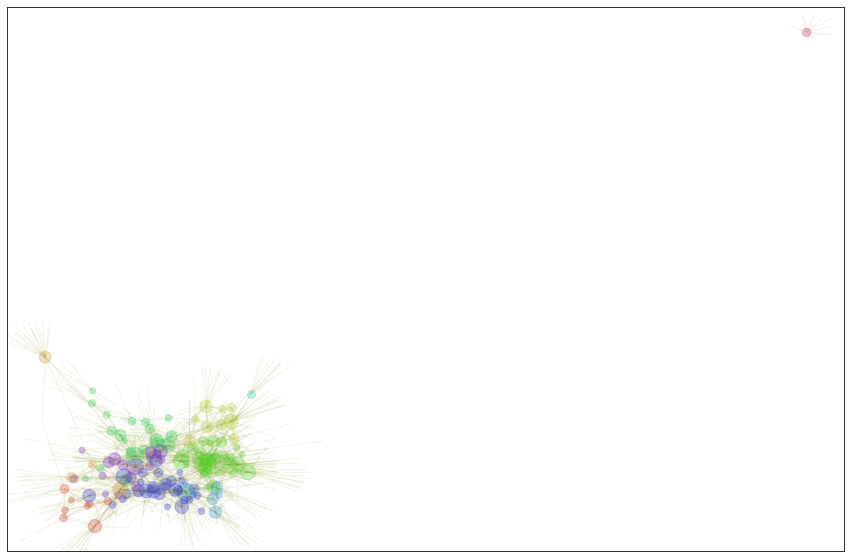

In [127]:
draw_graph_centrality2(G, gnl.mcommunity(G),k = 0.02, fontsize= 0)

De mest sentrale dokumentene basert på _betweenness_

In [81]:
sentral_dok = nb.central_betweenness_characters(G, 10)
mu.printmd('\n\n'.join(["`" + str(round(x[1], 4)) + '`  ' + labels[x[0]] for x in sentral_dok]))
mu.printmd("\n\n--------\n\n")

`0.0972`  194    NOU 1995: 18 Ny lovgivning om opplæring "... og for øvrig kan man gjøre som man vil"

`0.0932`  203    NOU 2000: 14 Frihet med ansvar om høyere utdanning og forskning i Norge

`0.0885`  340    NOU 2009: 18 Rett til læring

`0.0759`  205    NOU 2000: 3 Samisk lærerutdanning - mellom ulike kunnskapstradisjoner

`0.0753`  311    NOU 1988: 28 Med viten og vilje

`0.0686`  298    NOU 1985: 14 Samisk kultur og utdanning

`0.0642`  227    St.meld. nr. 40 (1990—91) Fra visjon til virke Om høgre utdanning

`0.0625`  339    NOU 2008: 3 Sett under ett: ny struktur i høyere utdanning

`0.0616`  174    NOU 1999: 33 Nyttige lærepenger - om utdanningsfinansiering gjennom Lånekassen

`0.0586`  165    NOU 1986: 23 Livslang læring



--------



In [82]:
sentral_dok = nb.central_characters(G, 10)
mu.printmd('\n\n'.join(["`" + str(round(x[1], 4)) + '`  ' + labels[x[0]] for x in sentral_dok]))
mu.printmd("\n\n--------\n\n")

`0.1043`  203    NOU 2000: 14 Frihet med ansvar om høyere utdanning og forskning i Norge

`0.1043`  194    NOU 1995: 18 Ny lovgivning om opplæring "... og for øvrig kan man gjøre som man vil"

`0.1019`  340    NOU 2009: 18 Rett til læring

`0.0948`  341    NOU 2010: 7 Mangfold og mestring: flerspråklige barn, unge og voksne i opplæringssystemet

`0.09`  174    NOU 1999: 33 Nyttige lærepenger - om utdanningsfinansiering gjennom Lånekassen

`0.0829`  476    NOU 2003: 16 I første rekke: forsterket kvalitet i en grunnopplæring for alle

`0.0806`  227    St.meld. nr. 40 (1990—91) Fra visjon til virke Om høgre utdanning

`0.0782`  311    NOU 1988: 28 Med viten og vilje

`0.0758`  344    NOU 2012: 1 Til barnas beste Ny lovgivning for barnehagene

`0.0687`  347    NOU 2014: 7 Elevenes læring i fremtidens skole Et kunnskapsgrunnlag



--------



Og her basert på ren sentralitet, de dokumentene som er knyttet til flest andre. Skal samsvare med referansehyppighet. Listen er ganske lik den over.

### Clustring

Selve clustringen ligger i kommandoen `gnl.community_dict`. Nodene, som er nøkler, erstattes av korresponderende tittel. Hvert cluster er ordnet etter sentralitet, det meste sentrale først.

In [1]:
cg = gnl.community_dict(G)
translate = {x:[labels[z] for z in cg[x]] for x in cg}

Overskrift = "## Det er {n}  clustre basert på {d} dokumenter\n\n".format(n = len(cg), d = len(G.nodes()))
rows = '\n\n'.join(["__Cluster "+ str(i + 1) + "__\n\n* " + '\n\n* '.join(translate[x]) for i,x in enumerate(translate)])
mu.printmd(Overskrift + rows)

NameError: name 'gnl' is not defined

In [84]:
for i in cg:
    print(i, len(cg[i]))

VFE2E59A-DN3YBFQM 40
V4RID8TN-3N9XWYFJ 82
JQNL2KII-HLGK973Q 77
3ETZFFNS-33CHN65F 46
CEDN8EB5-3SSXIPXK 8
3SN7EBSL-RTTHJN6V 56
PY7VZARY-GVLDYG9U 45
97Z5KABU-YKFJBKEF 24
A4ZPDKMT-CC5FSKP9 2
HL2YSKU9-B6876BD4 32
ERW4A5K3-298BNUC8 11


VFE2E59A-J7JUTEAB 34
V4RID8TN-3N9XWYFJ 76
HLGK973Q-2CAC6487 57
3ETZFFNS-7WSWWYHM 24
CEDN8EB5-RZQZTZRG 8
DNXZWQYC-33CHN65F 40
JQNL2KII-C4J4FFM6 38
PY7VZARY-3SN7EBSL 109
97Z5KABU-YKFJBKEF 24
A4ZPDKMT-CC5FSKP9 2
ERW4A5K3-U8TX647F 11

In [85]:
tot = co.nbtotals()

In [86]:
cg.keys()

dict_keys(['VFE2E59A-DN3YBFQM', 'V4RID8TN-3N9XWYFJ', 'JQNL2KII-HLGK973Q', '3ETZFFNS-33CHN65F', 'CEDN8EB5-3SSXIPXK', '3SN7EBSL-RTTHJN6V', 'PY7VZARY-GVLDYG9U', '97Z5KABU-YKFJBKEF', 'A4ZPDKMT-CC5FSKP9', 'HL2YSKU9-B6876BD4', 'ERW4A5K3-298BNUC8'])

In [87]:
dtm = pd.concat([co.corpus_text(cg[x], columns = x) for x in cg], axis = 1)

In [88]:
dtm_totals = dtm.sum()

# Basert på antall ord

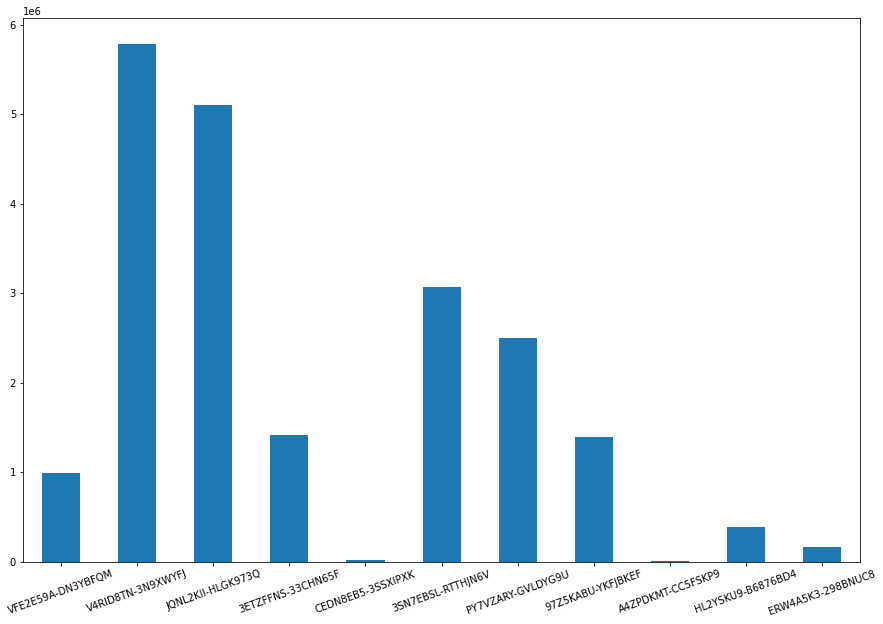

In [89]:
dtm_totals.plot(kind = 'bar', rot=20)

# Antall dokument

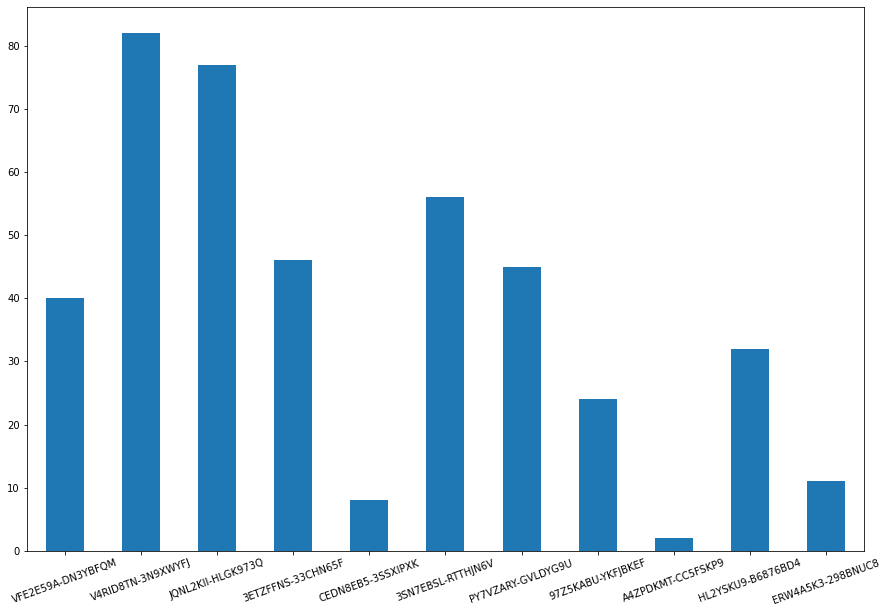

In [90]:
nb.frame(cg).transpose().count().plot(kind='bar', rot = 20)

In [91]:
cg.keys()

dict_keys(['VFE2E59A-DN3YBFQM', 'V4RID8TN-3N9XWYFJ', 'JQNL2KII-HLGK973Q', '3ETZFFNS-33CHN65F', 'CEDN8EB5-3SSXIPXK', '3SN7EBSL-RTTHJN6V', 'PY7VZARY-GVLDYG9U', '97Z5KABU-YKFJBKEF', 'A4ZPDKMT-CC5FSKP9', 'HL2YSKU9-B6876BD4', 'ERW4A5K3-298BNUC8'])

In [92]:
# mapping fra forrige
numbering_of_clusters =[x.split() for x in """1 VFE2E59A-TR6PDBUB
2 3N9XWYFJ-ZBR2P2MG
3 JQNL2KII-HLGK973Q
4 V4RID8TN-33CHN65F
5 3ETZFFNS-7WSWWYHM
6 DNXZWQYC-34G9QI8T
7 PY7VZARY-3SN7EBSL
8 HS2MRUCX-V37PB4KM
9 A4ZPDKMT-CC5FSKP9
10 ERW4A5K3-874N6QHD
11 97Z5KABU-LFLTWJAM""".split('\n')]

dict(numbering_of_clusters)

{'1': 'VFE2E59A-TR6PDBUB',
 '2': '3N9XWYFJ-ZBR2P2MG',
 '3': 'JQNL2KII-HLGK973Q',
 '4': 'V4RID8TN-33CHN65F',
 '5': '3ETZFFNS-7WSWWYHM',
 '6': 'DNXZWQYC-34G9QI8T',
 '7': 'PY7VZARY-3SN7EBSL',
 '8': 'HS2MRUCX-V37PB4KM',
 '9': 'A4ZPDKMT-CC5FSKP9',
 '10': 'ERW4A5K3-874N6QHD',
 '11': '97Z5KABU-LFLTWJAM'}

In [93]:
cluster_numbers = dict([(x[1], x[0]) for x in numbering_of_clusters])

In [94]:
numbers = dict([(x[0], list(x[1].split('-'))) for x in numbering_of_clusters])

In [95]:
numbers

{'1': ['VFE2E59A', 'TR6PDBUB'],
 '2': ['3N9XWYFJ', 'ZBR2P2MG'],
 '3': ['JQNL2KII', 'HLGK973Q'],
 '4': ['V4RID8TN', '33CHN65F'],
 '5': ['3ETZFFNS', '7WSWWYHM'],
 '6': ['DNXZWQYC', '34G9QI8T'],
 '7': ['PY7VZARY', '3SN7EBSL'],
 '8': ['HS2MRUCX', 'V37PB4KM'],
 '9': ['A4ZPDKMT', 'CC5FSKP9'],
 '10': ['ERW4A5K3', '874N6QHD'],
 '11': ['97Z5KABU', 'LFLTWJAM']}

In [96]:
cluster_numbers = {x:list(cluster_numbers[x]) for x in cluster_numbers}

In [97]:
for x in cg:
    for y in numbers:
        s = set(cg[x]) & set(numbers[y]) 
        if len(s) >= 1:
            print(x,numbers[y], y, s)

VFE2E59A-DN3YBFQM ['VFE2E59A', 'TR6PDBUB'] 1 {'VFE2E59A'}
V4RID8TN-3N9XWYFJ ['3N9XWYFJ', 'ZBR2P2MG'] 2 {'3N9XWYFJ', 'ZBR2P2MG'}
V4RID8TN-3N9XWYFJ ['V4RID8TN', '33CHN65F'] 4 {'V4RID8TN'}
JQNL2KII-HLGK973Q ['VFE2E59A', 'TR6PDBUB'] 1 {'TR6PDBUB'}
JQNL2KII-HLGK973Q ['JQNL2KII', 'HLGK973Q'] 3 {'JQNL2KII', 'HLGK973Q'}
3ETZFFNS-33CHN65F ['V4RID8TN', '33CHN65F'] 4 {'33CHN65F'}
3ETZFFNS-33CHN65F ['3ETZFFNS', '7WSWWYHM'] 5 {'7WSWWYHM', '3ETZFFNS'}
3SN7EBSL-RTTHJN6V ['DNXZWQYC', '34G9QI8T'] 6 {'DNXZWQYC', '34G9QI8T'}
3SN7EBSL-RTTHJN6V ['PY7VZARY', '3SN7EBSL'] 7 {'3SN7EBSL'}
3SN7EBSL-RTTHJN6V ['97Z5KABU', 'LFLTWJAM'] 11 {'LFLTWJAM'}
PY7VZARY-GVLDYG9U ['PY7VZARY', '3SN7EBSL'] 7 {'PY7VZARY'}
PY7VZARY-GVLDYG9U ['HS2MRUCX', 'V37PB4KM'] 8 {'HS2MRUCX', 'V37PB4KM'}
97Z5KABU-YKFJBKEF ['97Z5KABU', 'LFLTWJAM'] 11 {'97Z5KABU'}
A4ZPDKMT-CC5FSKP9 ['A4ZPDKMT', 'CC5FSKP9'] 9 {'A4ZPDKMT', 'CC5FSKP9'}
ERW4A5K3-298BNUC8 ['ERW4A5K3', '874N6QHD'] 10 {'ERW4A5K3', '874N6QHD'}


In [98]:
def check(dictionary, val, default = -1):
    if val in dictionary:
        res = dictionary[val]
    else:
        res = default
    return res
        

In [99]:
list(map(lambda x: check(cluster_numbers,x) , cg.keys()))

[-1, -1, ['3'], -1, -1, -1, -1, -1, ['9'], -1, -1]

In [100]:
for j,i in enumerate(dtm_totals.index):
    a = i.split('-')
    print(j + 1, i)
    print(ldict[a[0]], ldict[a[1]])
    print()

1 VFE2E59A-DN3YBFQM
364    St.meld. nr. 13 (2011–2012) Utdanning for velferd Samspill i praksis 373    St.meld. nr. 18 (2012–2013) Lange linjer  – kunnskap gir muligheter

2 V4RID8TN-3N9XWYFJ
340    NOU 2009: 18 Rett til læring 341    NOU 2010: 7 Mangfold og mestring: flerspråklige barn, unge og voksne i opplæringssystemet

3 JQNL2KII-HLGK973Q
203    NOU 2000: 14 Frihet med ansvar om høyere utdanning og forskning i Norge 339    NOU 2008: 3 Sett under ett: ny struktur i høyere utdanning

4 3ETZFFNS-33CHN65F
194    NOU 1995: 18 Ny lovgivning om opplæring "... og for øvrig kan man gjøre som man vil" 495    St.meld. nr. 54 (1989-90) Om opplæring av barn, unge og voksne med særskilte behov.

5 CEDN8EB5-3SSXIPXK
487    St.meld. nr. 27 (2004-2005) Om opplæringen innenfor kriminalomsorgen “Enda en vår” 117    NOU 1981: 35 Politiets rolle i samfunnet:delutredning I

6 3SN7EBSL-RTTHJN6V
227    St.meld. nr. 40 (1990—91) Fra visjon til virke Om høgre utdanning 170    NOU 1991: 4 Veien videre : til

In [101]:
norden = "norge finland sverige danmark norsk norske finsk finske svensk svenske norden nordisk nordiske".split()
norden += [x.capitalize() for x in norden]

In [102]:
norden

['norge',
 'finland',
 'sverige',
 'danmark',
 'norsk',
 'norske',
 'finsk',
 'finske',
 'svensk',
 'svenske',
 'norden',
 'nordisk',
 'nordiske',
 'Norge',
 'Finland',
 'Sverige',
 'Danmark',
 'Norsk',
 'Norske',
 'Finsk',
 'Finske',
 'Svensk',
 'Svenske',
 'Norden',
 'Nordisk',
 'Nordiske']

In [103]:
dtm.sum(axis = 1).sort_values(ascending = False).head(50)

.         902503.0
,         662247.0
og        651972.0
i         577208.0
av        367158.0
for       364613.0
til       331140.0
er        294600.0
som       287063.0
å         258153.0
det       236048.0
at        223064.0
en        205407.0
med       185037.0
på        174240.0
har       158838.0
de        139680.0
-         135070.0
om        132715.0
)         111885.0
den       107608.0
et        103932.0
(         103199.0
kan        98150.0
:          93394.0
vil        89724.0
Det        84298.0
ikke       79171.0
fra        72143.0
skal       67121.0
I          63973.0
eller      62654.0
ved        61497.0
også       55040.0
være       50649.0
må         43489.0
dette      42284.0
seg        41239.0
mellom     41049.0
andre      40790.0
»          38984.0
«          38590.0
/          35536.0
etter      34899.0
år         34380.0
Dette      31784.0
enn        30341.0
blir       29269.0
ble        29080.0
mer        29005.0
dtype: float64

In [104]:
nb.normalize_corpus_dataframe(dtm)

True

In [105]:
ppt_ord = """Grunnlov
Formål
Normer
Verdier
Rettigheter
Flerkulturell
Mangfold
mangfoldig
Religion
Tospråklige
Skole
Skoleeier
Oppgavefordeling
Undervisning
Ledelse
""".split()
ppt_ord += [x.lower() for x in ppt_ord]
ppt_ord = list(set(ppt_ord))

In [106]:
ppt_ord

['flerkulturell',
 'religion',
 'skoleeier',
 'tospråklige',
 'Formål',
 'Normer',
 'verdier',
 'mangfoldig',
 'Oppgavefordeling',
 'Ledelse',
 'ledelse',
 'Religion',
 'normer',
 'mangfold',
 'Tospråklige',
 'oppgavefordeling',
 'Grunnlov',
 'Skoleeier',
 'Undervisning',
 'Skole',
 'formål',
 'rettigheter',
 'Rettigheter',
 'skole',
 'grunnlov',
 'Verdier',
 'undervisning',
 'Mangfold',
 'Flerkulturell']

In [107]:
(dtm.loc[[x for x in ppt_ord if x in dtm.index]]*100000).fillna(0).style.background_gradient(axis = 1)

,VFE2E59A-DN3YBFQM,V4RID8TN-3N9XWYFJ,JQNL2KII-HLGK973Q,3ETZFFNS-33CHN65F,CEDN8EB5-3SSXIPXK,3SN7EBSL-RTTHJN6V,PY7VZARY-GVLDYG9U,97Z5KABU-YKFJBKEF,A4ZPDKMT-CC5FSKP9,HL2YSKU9-B6876BD4,ERW4A5K3-298BNUC8
flerkulturell,0.403883,2.005753,0.920283,0.070627,0.000000,0.651940,0.000000,1.643652,0.000000,3.914895,0.000000
religion,0.706795,5.463947,4.288129,0.776898,0.000000,10.137667,0.120141,5.502661,0.000000,2.609930,0.000000
skoleeier,0.504854,5.671439,0.920283,1.624423,54.032149,1.043104,0.160188,0.214389,0.000000,0.000000,0.000000
tospråklige,0.000000,2.766555,0.215385,0.141254,0.000000,0.977910,0.000000,2.644136,0.000000,91.347559,0.000000
Formål,0.100971,2.195953,0.469932,0.565017,0.000000,0.423761,0.320377,0.000000,0.000000,0.521986,0.000000
Normer,0.000000,0.172910,0.058741,0.000000,0.000000,0.097791,0.040047,0.000000,0.000000,0.000000,0.000000
verdier,5.250478,11.584951,7.479749,2.754457,13.508037,14.896829,6.047111,12.291658,0.000000,13.310644,0.000000
mangfoldig,2.120385,1.919298,0.861542,0.282508,0.000000,1.336477,0.961130,0.142926,0.000000,1.565958,1.200127
Oppgavefordeling,0.000000,0.000000,0.019580,0.353136,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Ledelse,1.615532,1.123913,0.861542,0.494390,0.000000,0.651940,0.320377,0.285853,0.000000,0.000000,0.000000


In [108]:
(dtm.loc[[x for x in "opplæring tilpasset grunnloven grunnlov rettigheter spesialundervisning".split() if x in dtm.index]]*1000000).fillna(0).style.background_gradient(axis = 1)

,VFE2E59A-DN3YBFQM,V4RID8TN-3N9XWYFJ,JQNL2KII-HLGK973Q,3ETZFFNS-33CHN65F,CEDN8EB5-3SSXIPXK,3SN7EBSL-RTTHJN6V,PY7VZARY-GVLDYG9U,97Z5KABU-YKFJBKEF,A4ZPDKMT-CC5FSKP9,HL2YSKU9-B6876BD4,ERW4A5K3-298BNUC8
opplæring,474.562443,1191.866673,380.840642,2654.166611,10266.108334,1172.188109,149.776137,285.137885,0.000000,2281.079050,78.008269
tilpasset,113.087221,229.624103,105.734677,150.435734,1283.263542,126.802329,51.660753,77.894811,1010.526316,143.546164,54.005725
grunnloven,0.000000,6.743479,5.482539,15.537963,67.540186,0.977910,0.800942,105.050800,0.000000,0.000000,0.000000
grunnlov,0.000000,1.729097,3.132879,7.062711,0.000000,3.259700,0.400471,63.602185,0.000000,7.829791,0.000000
rettigheter,223.145319,268.528789,195.804957,280.389607,337.700932,67.149819,61.272056,676.755831,0.000000,109.617071,18.001908
spesialundervisning,2.019415,131.757204,4.111904,470.376520,135.080373,40.094310,3.203768,0.714631,0.000000,31.319163,0.000000


In [109]:
mu.printmd( "## De viktigste ordene i hvert cluster\n\n".format(n = len(cg), d = len(G.nodes())))


for x in cg:
    #mu.printmd(x)
    translate = [labels[z] for z in cg[x][:10]]
    mu.printmd('### Topp rapporter')
    mu.printmd(', '.join(translate))
    mu.printmd('\n\n')
    rows = ', '.join(
        (
            co.corpus_text(cg[x])['freq']/tot['tot']
        ).sort_values(
            ascending = False
        )[:130].index
    )
    mu.printmd('#### Viktigste ord')
    mu.printmd(rows)



## De viktigste ordene i hvert cluster



### Topp rapporter

364    St.meld. nr. 13 (2011–2012) Utdanning for velferd Samspill i praksis, 373    St.meld. nr. 18 (2012–2013) Lange linjer  – kunnskap gir muligheter, 391    St.meld. nr. 9 (2016–2017) Fagfolk for fremtiden Fagskoleutdanning, 370    St.meld. nr. 16 (2016–2017) Kultur for kvalitet i høyere utdanning, 369    St.meld. nr. 16 (2015–2016) Fra utenforskap til ny sjanse Samordnet innsats for voksnes læring, 374    St.meld. nr. 18 (2014-2015) Konsentrasjon for kvalitet Strukturreform i universitets- og høyskolesektoren, 346    NOU 2014: 5 MOOC til Norge Nye digitale læringsformer i høyere utdanning, 390    St.meld. nr. 7 (2014–2015) Langtidsplan for forskning og  høyere utdanning 2015–2024, 382    St.meld. nr. 30 (2008-2009) Klima for forskning, 65    St.meld. nr. 12 (2012–2013) Perspektivmeldingen 2013

#### Viktigste ord

2016, utdan-, 2014, Velferd, Meld, 2015, 2013, stu-, fagskoler, 2060, migrasjon, Hindre, produktivitetsvekst, Fagfolk, Kunnskapsdepartementet, utdanningene, velferds-, Fastlands-Norge, tje, omsorgstjenesten, høyskolene, Mestring, botid, finanskrisen, 2012, nester, vandrere, digitalisering, vel-, omsorgstjenestene, velferdsordninger, produk, 2015., innvandrerforeldre, omsorgstjenester, referansebanen, lønnstilskudd, Immigration, finanser, omsorgsdepartementet, Innvandrere, insentiver, nale, virk, ningene, EU-land, sosialfaglig, omsorgssektoren, OECD-land, 2017, Sentral-, utdanningsvalg, norskfødte, immigrants, EØS-land, 2011, utdanninger, kompetansebehov, innvandrergrupper, fag-, yrkesdeltakelse, pensjonsfond, miske, tjenes, dringer, lavinntekt, nomi, innvandreres, oljeinntekter, spesialisthelsetjenesten, stykkevis, kunn-, Innvandring, omsorgsboliger, tivt, helseforetakene, innvandringspolitikk, 2035, 1408, Fafo-rapport, helseforetak, arbeidstilbudet, hjemmetjenester, fastlegeordningen, høyskoler, NAV, høy-, befolk-, 2050, framvoksende, gjel-, lønnsdannelsen, vendepunkt, kompetanse-, 2030, trygdetid, utvik, stønader, kvalitets-, Holmøy, toren, yrkesdeltaking, innvandring, serte, pst., kere, Arbeids-, somheten, innvandrere, mastergrad, informa-, Boks, kontantstøtte, fagmiljøene, Mbit, grup-, universitets-, innvandringen, kvalitetsutvikling, arbeidsmarkedspolitikken, blemer, kommu-, digital, norskkunnskaper, Prop, bredbånd, .............., helsetjenestene, Kvalitetsreformen, bærekraft

### Topp rapporter

340    NOU 2009: 18 Rett til læring, 341    NOU 2010: 7 Mangfold og mestring: flerspråklige barn, unge og voksne i opplæringssystemet, 476    NOU 2003: 16 I første rekke: forsterket kvalitet i en grunnopplæring for alle, 344    NOU 2012: 1 Til barnas beste Ny lovgivning for barnehagene, 347    NOU 2014: 7 Elevenes læring i fremtidens skole Et kunnskapsgrunnlag, 368    St.meld. nr. 16 (2006-2007) ... og ingen sto igjen Tidlig innsats for livslang læring, 488    St.meld. nr. 30 (2003-2004) Kultur for læring, 348    NOU 2015: 2 Å høre til Virkemidler for et trygt psykososialt miljø, 349    NOU 2015: 8 Fremtidens skole Fornyelse av fag og kompetanser, 337    NOU 2007: 6 Formål for framtida: formål for barnehagen og opplæringen

#### Viktigste ord

grunnopplæringen, oppgavefordelingen, 2016, ært, utdan-, ået, funksjonsnedsettelser, skoleeier, yrkesopplæringen, opplæringsloven, Mangfold, ølge, är, 2014, ønn, likelønn, fyl, nale, Kunnskapsdepartementet, Sametingets, maksimalpris, minoritetsspråklige, Helhet, Sametinget, munen, æringen, Utdanningsdirektoratet, ettersp, tros-, Meld, grunnopplæring, barnehagane, tje, utdanningsvalg, virksom-, livssynssamfunn, læringsutbytte, æring, lønnsforskjellene, kvinnedominerte, oppgåvefordeling, barnehagesektoren, ålet, regio, 2012, Fastlands-Norge, utvik, Opplæringsloven, somheten, kommu-, kirkeordning, Kunnskapsløftet, læreplass, ar-, inntektsoppgjørene, nester, beid, barnehagar, PP-tjenesten, forvaltningsnivåene, ørt, miske, barnehageloven, kommunesektoren, 2015, åd, kvalitetsvurdering, Vox, verdiskaping, funk-, grunnskoleopplæring, virk, lønnsdannelsen, inkludering, opplæringstilbudet, norskopplæring, språkopplæring, vur, lønnsveksten, lokaldemokratiet, 2013, tjenes, dringer, infor-, utdanningsprogram, mentet, nelse, toren, elev-, urfolks, flerspråklige, nene, førskole, Samspill, PISA, utdannings, sko-, skoleledere, øp, lertid, kompetanse-, lærebedrift, innvandrerforeldre, virk-, oppgave-, kunn-, Utvalgets, Stmeld, gjel-, behovsdekning, lønnsforskjeller, bestem-, kar-, misk, res-, fylkes, økono-, studiepoeng, beidet, delse, leggende, ressurssituasjonen, Arbeids-, barnehagetilbud, forvaltningsnivåer, .............., poli, strekkelig, læreplanene, St.meld

### Topp rapporter

203    NOU 2000: 14 Frihet med ansvar om høyere utdanning og forskning i Norge, 339    NOU 2008: 3 Sett under ett: ny struktur i høyere utdanning, 186    St.meld. nr. 27 (2000-2001) Gjør din plikt - Krev din rett Kvalitetsreform av høyere utdanning, 181    St.meld. nr. 42 (1997-98) Kompetansereformen, 365    St.meld. nr. 14 (2008-2009) Internasjonalisering av utdanning, 481    St.meld. nr. 16 (2001-2002) Kvalitetsreformen Om ny lærerutdanning Mangforldig - Krevende - relevant, 179    St.meld. nr. 36 (1998-99) Om prinsipper for dimensjonering av høgre utdanning, 389    St.meld. nr. 7 (2007-2008) Statusrapport for Kvalitetsreformen  i høgre utdanning, 172    NOU 1997: 25 Ny kompetanse Grunnlaget for en helhetlig etter- og videreutdanningspolitikk, 477    NOU 2003: 25 Ny lov om universiteter og høyskoler

#### Viktigste ord

Kvalitetsreformen, utdan-, ært, åd, øp, utvik, ålet, ølge, høyskolene, Institusjonene, institusjonenes, virk, somheten, æring, ørt, miske, ået, funk, lensmannsdistrikt, stu-, øres, funksjonsevne, tilknytningsform, realkompetanse, næ, praktisk-pedagogisk, høyskoler, funksjons, tje, mentet, utdanningsinstitusjonene, misk, ønn, rammeprogram, forskerutdanning, lærarutdanning, jonene, ettersp, Sametingets, statsregnskapet, nale, foresl, insti, vur, institusj, Universitetene, statsr, Frihet, æringen, universitets-, Fastlands-Norge, somhet, sjonene, ming, virksom-, videref, forsknings, produk, samar, studieplasser, Mangfold, toren, OECD-land, utdannings, stiftelser, forsk, institusjonene, nærings, beid, utdanninger, Nasjonalbudsjettet, FoU, politidistrikt, Internasjonalisering, forvaltnings, næringspolitikken, utdanningsinstitusjoner, meistring, kommersialisering, rammeplaner, museenes, Krev, Forskningsrådet, etter-, grunnkapital, NIFU, øring, studietilbud, tikken, nyskaping, doktorgrader, åte, poli, fyl, Forskningsrådets, Sametinget, beidet, universiteter, viten-, grunnforskning, Universell, ørte, duksjon, øene, instituttsektoren, høgskolesektoren, studiepoeng, utdanningene, OECD-landene, regio, universitetenes, res-, GIEK, FoU-arbeid, ledigheten, tjenes, lertid, ordin, hetene, ærer, forskningssamarbeid, Utdannings-, omfat, ringslivet, områ, pst, stiftelsens, tivt, arbeids, Kunnskapsdepartementet

### Topp rapporter

194    NOU 1995: 18 Ny lovgivning om opplæring "... og for øvrig kan man gjøre som man vil", 495    St.meld. nr. 54 (1989-90) Om opplæring av barn, unge og voksne med særskilte behov., 336    NOU 2007: 11 Studieforbund - læring for livet, 394    St.meld. nr. 23 (1997—98) Om opplæring for barn, unge og vaksne med særskilde behov Den spesialpedagogiske tiltakskjeda og det statlege støttesystemet, 223    St.meld. nr. 35 (1990—91) Tillegg til St.meld. nr. 54 (1989—90) Om opplæring av barn, unge og voksne med særskilte behov, 215    St.meld. nr. 20 (2000-2001) Om korte yrkesrettede utdanninger etter videregående opplæring, 197    NOU 1997: 16 Tilskuddssystemet for private skoler, 401    St.meld. nr. 61 (1984-85) Om visse sider ved spesialundervisninga og den pedagogisk-psykologiske tenesta, 480    St.meld. nr. 14 (2003-2004) Om opplæringstilbod for hørselshemma, 230    St.meld. nr. 45 (1997-98) Om visse endringar i tilskotsordninga for skolar som får statstilskot etter lov om tilskot til private grunnskular og private skular som gjev vidaregåande opplæring

#### Viktigste ord

gsl, studieforbund, kompetansesentra, ået, pedagogisk-psykologiske, undervisningspersonalet, Lovtidend, bortvisning, æring, virk, grunnskoler, grunnskoleloven, grunnskoleopplæring, utdan-, Steinerskolen, arbeidsrettslige, utvik, statutes, skolar, skolane, mentet, statstilskot, arbeids, spesialpedagogiske, lovfestes, arbeidsmilj, videreg, Lovdata, Videreføring, æringen, regelsett, døvblinde, somheten, statute, tenesta, sko-, lovverket, beid, vur, fyl, spesialundervisning, yrkesrettede, opplæringstilbud, valgkretser, PP-tjenesten, lærebedrift, arbeidsmiljølovens, særskilde, statlege, funksjons, Utvalgets, åd, tje, 9.20, bestem-, pri-, beidet, 9.17, funk, statstilskudd, oppl, helgedagsarbeid, spesialpedagogisk, omfat, stillingsvern, funksjonshemma, fagopplæringen, sakkunnig, munen, tilskotet, tilskuddsordning, kelte, samar, 9.50, lovfesting, kompetansesenter, skolepenger, vaksenopplæring, utvalgets, Kyrkje-, gisk, elevtall, nale, bestem, privatskoler, utdanningskontor, opplæringstilbudet, voksenopplæringen, fagskole, driftstilskudd, områ, dringer, tilskot, instansar, spesial, forvaltnings, Regionale, kompetansekrav, Arbeidsgruppa, innarbeides, vidaregåande, øp, grunnopplæring, Vox, skoleanlegg, delse, somhet, arbeidsgruppa, sakkunnige, gjel-, Arbeids, Aagesen, utviklingshemma, lertid, forskingsdepartementet, virksomhetenes, utviklings, Briskeby, lærekontrakt, Jahnsen, arbeidsmiljøproblemer, skular, VURDERINGER, blemer, særlovgivningen, kommu-, tjenestemannsloven, Osloregionen, Nord-Noreg, skoleledere

### Topp rapporter

487    St.meld. nr. 27 (2004-2005) Om opplæringen innenfor kriminalomsorgen “Enda en vår”, 117    NOU 1981: 35 Politiets rolle i samfunnet:delutredning I, 118    NOU 1988: 39 Politi og påtalemyndighet:arbeids- og ansvarsfordeling : utredning fra et utvalg oppnevnt ved kongelig resolusjon av 16. januar 1987 : avgitt til Justis- og politidepartementet november 1988, 119    NOU 1991: 29 Lensmannsetatens oppgaver og organisering:utredning fra et utvalg oppnevnt av Justis- og politidepartementet ved brev av 20. juni 1990 : avgitt til [sic] 27. juni 1991, 129    St.meld. nr. 23 (1991-92) Om bekjempelse av kriminalitet, 132    NOU 1987: 27 Politiets rolle og oppgaver i samfunnet: delutredning II, 284    St.meld. nr. 23 (2003-2004) Om boligpolitikken, 131    St.meld. nr. 27 (1997-98) Om kriminalomsorgen

#### Viktigste ord

kriminalomsorgen, innsattes, innsatte, skoleeier, fengslene, fengslets, Skaalvik, pilotprosjekt, grunnopplæringen, matematikkvansker, fengsler, sikkerhetsnivå, lærebedrift, Departementets, yrkesfaglig, løslatelse, elevplasser, Friestad, Utdannings-, tverretatlige, norskopplæring, opplæringen, utdanningsbakgrunn, Evalueringen, fremtidsplaner, 2.7.1, Opplæringsloven, 2.7.2, gymsal, kompetansegivende, forskningsdepartementet, Opplæringen, opplæringstilbud, strategiplan, initieres, Europarådet, domfelte, påbegynne, lærevansker, opplæringsloven, minoritetsspråklige, 0033, Vox, St.meld, fengslet, Publikasjonen, visningen, Avtalene, skrivevansker, læreplanverket, utdanningsnivået, miske, disiplinære, kriminalomsorg, dagpengene, låsing, stoff-, nettbasert, .............., rus-, 3.1.6, ferdighetstrening, løslatte, synergieffekter, skolepliktige, gjerningsmenn, Rundskrivet, Oppfølgingen, læremidlene, Fengsel, samfunnskunnskap, opplæring, tilsettinger, oppholds-, sikkerhetsrisiko, Gjennomført, gjørende, kompetansebevis, tilskuddsordning, rutinepreget, Sikkerheten, sakker, Botsfengslet, GCS, prøveløslatelse, erfaringsbaserte, Bredtveit, Øgrim, kriminologi, språkproblemer, undervisningssituasjon, tilsyns-, beid, nelle, skoletilbudet, Kartleggingen, yrkesopplæringen, opplæringsplaner, ansvarsforholdet, misjoner, læringen, Aetat, kartlagte, Samuelsson, Fremtidige, Hindre, utarbeidingen, 2.4.3, lovgiving, Fengslet, 65,5, Regionalt, knesatt, teter, kvalitetsforbedring, Tilpasset, refs, studiekompetanse, terier, gig, toren, lovfesting, helsetilbud, landske, domfeltes, skolers, grammet, selvregulering, hovet, yrkesrettede

### Topp rapporter

227    St.meld. nr. 40 (1990—91) Fra visjon til virke Om høgre utdanning, 170    NOU 1991: 4 Veien videre : til studie - og yrkeskompetanse for alle, 228    St.meld. nr. 40 (1992—93) ... vi smaa, en Alen lange; Om 6-åringer i skolen - konsekvenser for skoleløpet og retningslinjer for dets innhold, 225    St.meld. nr. 37 (1990—91) Om organisering og styring i utdanningssektoren, 220    St.meld. nr. 29 (1994-95) Om prinsipper og retningslinjer for 10-årig grunnskole - ny læreplan, 221    St.meld. nr. 33 (1991-92) Kunnskap og kyndighet Om visse sider ved videregående opplæring, 229    St.meld. nr. 43 (1988-89) Mer kunnskap til flere, 196    NOU 1996: 22 Lærerutdanning Mellom krav og ideal, 178    St.meld. nr. 32 (1998-99) Videregående opplæring, 177    St.meld. nr. 28 (1998-99) Mot rikare mål Om einskapsskolen, det likeverdige opplæringstilbodet og ein nasjonal strategi for vurdering og kvalitetsutvikling i grunnskolen og den vidaregåande opplæringa

#### Viktigste ord

fritidshjem, Lærerutdanning, utvik, Langtidsprogrammet, livssynsorientering, Fakultet, yrkes, Kristendomskunnskap, rammeplaner, utdannings, uketimer, teknisk-naturvitenskapelige, praktisk-pedagogisk, mentet, religions-, folkebevegelse, gymnaset, samar, yrkeskompetanse, insti, fylkeskommunane, fyl, KRL-faget, allmennlærerutdanning, beidet, beid, vur, skoleverk, yrkesopplæringen, forutset, FoU-arbeid, Avdelingsleder, somheten, Idretten, kelte, yrkesfag, studie-, praktisk-pedagogiske, nale, inntektssystemet, utdan-, AVH, skolane, stu, virk, ært, yrkesskolene, Fakultetet, fagopplæringen, danning, elevvurdering, studiekompetanse, allmennlærerutdanningen, produk, årskurs, lærerutdanning, tilskotet, Framtidig, miske, gjen, Tilråding, undervisnings, gym, universiteta, Styringsgruppen, norskundervisningen, stu-, organi, St.meld, yrkesfagene, fakultetene, gisk, Avdelingsdirektør, åd, kulturbygg, UNIT, institusj, 2030., fylkeskommunar, Underdirektør, ligheter, høringsuttalelsene, matematisk-naturvitenskapelige, gymnas, idretts, lærebedrift, yrkesskoler, ølge, skoleverket, høgskolene, mønsterplanen, høgskoler, skolebasert, læreplass, småskoletrinnet, NLS, fagkretsen, utdanningssektoren, lærerutdanningen, sambruk, utviklings, skolar, arbeids, grunnkurs, arbei, æring, Abonnement, faga, programperioden, skolefritidsordninger, sty, misk, niske, vendig, årskullet, Fastlands-Norge, sam, fag-, aktivi, områ, studieretningen, yrkesskolen, kristendomskunnskap, studieretninger, kontorfag, utdanninga, studieretningene, fagplaner, tradi, timetall

### Topp rapporter

174    NOU 1999: 33 Nyttige lærepenger - om utdanningsfinansiering gjennom Lånekassen, 311    NOU 1988: 28 Med viten og vilje, 184    NOU 1993: 24 Lov om universiteter og høgskoler, 182    NOU 1992: 33 Leve og lære : om utdanningsfinansiering og studentvelferd, 202    NOU 1991: 24 Organisering for helhet og mangfold i norsk forskning, 210    St.meld. nr. 14 (1993-94) Studiefinansiering og studentvelferd, 303    St.meld. nr. 28 (1988-1989) Om forskning, 183    NOU 1993: 13 Leve og laere: om utdanningsfinansiering og studentvelferd. 2, 218    St.meld. nr. 26 (1998-99) Økonomien i den statlege høgskolesektoren, 398    St.meld. nr. 49 (1996-97)  Prinsipp for rangering av søkjarar til studium ved universitet og høgskolar

#### Viktigste ord

Medlemmenes, førstekonsulent, høgskolesektoren, insti, Arkivverket, funksjonstid, utdan-, Opprettet, barnetrygden, mentet, ært, forskningsrådene, Lånekassen, høgskolar, barnefamilier, utvik, ønn, barnefamiliene, forsk, underdirektør, avdelingsdirektør, stipendet, øp, Nyttige, NKr, fylkeslege, stu, Riksarkivaren, Statlige, ået, forsknings, forbruksenhet, kunstnarar, virk, Utvalet, søkjarar, utdannings, ålet, NFFR, NTNF, forbruksutgift, byråsjef, forskerutdanning, videreg, nestleder, ålmenta, nyanskaffelser, sosialsjef, Abonnement, æring, mune, attf, studieplasser, stu-, kontorfullmektig, rek., avlevering, NTNFs, sty, vitenskapsdepartementet, høgskolene, kunstnarane, næ, somheten, vur, stipend, Utgifter, foresl, 0030, instituttenes, barnetrygd, privatister, husholdsarbeid, avdelingsingeniør, Industrifondet, skolepenger, NORAS, instituttene, høyskolene, videref, videogram, kelte, Bæ, låntakere, nærings, ter-, Tilskudd, statslån, avdelingsleder, høgskoler, reisestipend, Utval, forutset, 0032, kommunelege, arbeidstilbudet, h.r, skatteklasse, lærestedene, ordin, ordningane, studietid, yrkes, miske, høyskoler, ekspedisjonssjef, ørt, toren, høgskolesystemet, Universitetene, nale, NAVFs, beid, sorenskriverembete, behovsprøving, lærestedet, Institusjonens, utredningsinstitutt, sosialkurator, kretsfengsel, hyllemeter, førstesekretær, funk, høgskolelektor, leverast, ølge, samar, grunnforskning, Kultur-, meld

### Topp rapporter

298    NOU 1985: 14 Samisk kultur og utdanning, 205    NOU 2000: 3 Samisk lærerutdanning - mellom ulike kunnskapstradisjoner, 432    St.meld. nr. 53 (1988-89) Om næringspolitikk, 167    NOU 1980: 59 Samisk i grunnskolen, 455    NOU 1995: 6 Plan for helse- og sosialtjenester til den samiske befolkning i Norge, 135    NOU 1984: 18 Om samenes rettsstilling, 299    NOU 1987: 34 Samisk kultur og utdanning: de enkelte sektorer, administrasjon, 144    NOU 1982: 27 Funksjonsfordeling og administrasjonsordninger, 251    St.meld. nr. 41 (1996-97) Om norsk samepolitikk, 136    NOU 1975: 37 Videregående opplæring for samer

#### Viktigste ord

samisktalende, samenes, Samisk, duodji, miske, samiske, rettsstilling, misk, samisk, Samenes, NRL, urbefolkninger, nordsamisk, sørsamiske, norsktalende, samer, Samiske, samene, urbefolkning, reindriftsnæringen, NSR, valgkretser, ært, linjetjenesten, utvik, SLF, kulturbygg, Samene, tradi, insti, fyl, blemer, kulturfond, områ, sørsamisk, Sametinget, urbe, iske, næ, folkegruppe, jfr-, valgkrets, sam, reindriften, landsforbund, åd, vur, Sametingets, reindriftsloven, reindrift, utdan-, Nasjoners, Nesseby, æring, omfat, befolknings, kulturvern, samar, beidet, kelte, kulturminnevern, mentet, virk, Enare, Bergsland, åk, reinkjøtt, nale, Samer, poli, tospråklighet, Austenå, språks, videreg, nærings, Karasjok, Åsgård, Jokkmokk, folkerettslige, niske, beid, nelse, språk-, sosialtjenester, rasediskriminering, Kautokeino, næringspolitikk, Såmi, Husabø, ørt, vitenskapsdepartementet, Ordinære, forvaltnings, spr, utviklingsfond, lertid, somhet, forutset, Administrasjon, hetene, færøyske, folke, tutt, hengig, manntall, ølge, naturressursene, kulturråd, organets, minoritetene, minoritet, joiken, Utval, norskspråklige, organi, VURDERINGER, Lapperne, messige, delutredning, kulturminnevernet, kulturtiltak, Porsanger, kjerneområdet, ålet, tje, leggende, urbefolkningen, gjen, vikling, Abonnement

### Topp rapporter

216    St.meld. nr. 21 (1996—97) Finansiering av lærebøker for 2. - 10. klassetrinn og status for tilrettelegging av skolelokaler til seksåringer i forbindelse med Reform 97, 53    NOU 1995: 13 Kostnader ved skolestart for seksåringer: utredning fra et utvalg oppnevnt ved kongelig resolusjon 6. mai 1994 ; avgitt til Finans- og tolldepartementet 7. april 1995

#### Viktigste ord

seksåringer, Ferdige, Midlertidige, skolestart, ant, kommuneøkonomien, lærebøker, klassetrinn, lokaler, førskolen, femtedeler, Finansiering, spesialrom, fremdriften, Reform, Innst.S, ferdigstillelse, merutgifter, innsparing, Tilråding, tot, 2023, Asnes, ferdigattest, merkostnader, HØSTEN, snittlig, 2024, nuar, siske, investeringskostnadene, nasjonalbudsjett, forutset, FORBINDELSE, mill, merkostnadene, mentet, 2021, tidsskjema, kompensasjonen, elevplasser, 2028, Songdalen, mune, arbei, 0, 2022, meld, tilrettelegging, 2027, administrasjonssjef, 39.1, 2019, årskullene, Marnardal, klassetrinnene, Guovdageaidnu, 2017, klasserom, påløpe, læreplan, Lærebøker, tidsplan, utskifting, FINANSIERING, Fla, hx, tjenlige, 1547, 2018, arbeidsbøker, Snillfjord, Alstadhaug, kl., 1997., midlertidige, Audnedal, bekymringsfullt, 1539, forskningsdepartementet, skolebibliotek, utbygd, dert, Kommune, utdannings-, 1269, 1242, Vindafjord, folkeparti, 1144, 1246, 1149, uavklarte, hovedbok, 1243, grunnskoleloven, 1129, 1443, 1426, skolesjefen, Lokaler, 1259, 5.3.4, forskyvningen, 1146, 1251, 1424, 1238, 1244, .36, 1124, bevilgningen, 1264, klassene, 1233, klasserommene, 1253, 1141, 1151, påbegynt, 1418, 1127, 1256, 1142, 1442, 1441, Moskenes, Leirfjord, 1439, 1134

### Topp rapporter

165    NOU 1986: 23 Livslang læring, 314    NOU 1989: 13 Grenseløs læring mottak av utenlandske studenter, studentutveksling og internasjonalisering, 193    NOU 1995: 12 Opplæring i et flerkulturelt Norge, 302    St.meld. nr. 19 (1986-87) Tillegg til St.meld. nr. 66 (1984—85) Om høyere utdanning, 254    St.meld. nr. 74 (1979-80) Om invandrere i Norge, 250    St.meld. nr. 39 (1987-88) Om innvandringspolitikken, 164    NOU 1985: 26 Dokumentasjon av kunnskaper og ferdigheter: en utredning om voksnes rett til dokumentasjon i samsvar med Lov om voksenopplæring, § 3, 470    NOU 1986: 8 Flyktningers tilpasning til det norske samfunn, 256    NOU 1985: 29 Unge innvandrere i Norge, 86    NOU 1985: 35 Utvalget for vurdering av den offentlige forvaltning i det eksportfremmende arbeid

#### Viktigste ord

flerkulturelt, tospråklige, stu, høgskolar, minoritetselever, utdannings, landske, voksenpedagogisk, tospråklig, morsmålsundervisning, lånekasse, utvik, danning, norskopplæring, norskkunnskaper, livslang, Voksenopplæring, studia, Opplæring, fremmedspråklige, høgskolesystemet, utdan-, insti, universiteta, andrespråk, innpassing, kandidatar, voksenopplæring, samar, grunnskoleopplæring, norskundervisning, studieopplegg, pluralisme, norsk-, læresteder, opplæringstilbud, studieringer, utdanningspolitikken, vitenskapsdepartementet, flerkulturelle, NORADs, landsk, folkehøgskoler, Søkere, grunnutdanning, studieopphold, utdanningsinstitusjoner, miske, to-årig, tospråklighet, distriktshøgskolene, studieplasser, Abonnement, beid, utviklings, Universitetene, Kultur-, Lånekassen, pluralistiske, utdanningssystemet, vur, Caen, grunnutdanningen, UNESCOs, grads, studieplass, utdanningsinstitusjonene, nale, vidareutdanning, innvandrerbefolkningen, interna, seksåringer, yrkes, innføringskurs, assimilering, studieplaner, Høgskolesenteret, studenter, ingeniørutdanning, Utval, teter, sjonene, distrikts, hengig, studieåret, studietid, utviklingsland, grammet, pluralistisk, undervisningsinstitusjoner, kul-, morsmål, utdanningstilbud, tilboda, søkjarar, institusjonane, utdanninga, innvandrernes, vandrere, stipend, i-land, løyvingar, studentar, stipendiater, diplomer, Overseas, høgskoleutdanning, studiekompetanse, beidet, Regjeringa, jevngod, elevgrupper, sko-, stillingar, studietilbud, ningene, journalistar, 0602, Utvalget, høgskoler, samfunnskunnskap, høgskolene, tilskuddsordningen, Representanten, lovhjemlet, videre-, C-språk, gruppenivå, språkopplæring, realkompetanse

### Topp rapporter

320    St.meld. nr. 24 (1994—95) Nærkringkasting, 308    St.meld. nr. 88 (1981-82) Om medieutvikling og nye kringkastingsformer, 321    St.meld. nr. 26 (1991-92) Kringkasting og dagspresse 1990 m.v., 325    St.meld. nr. 39 (1990-91) Virksomheten i Norsk rikskringkasting m.v., 315    NOU 1995: 3 Mangfold i media: om eierkonsentrasjon i massemedia : utredning fra Eierskapsutvalget oppnevnt ved kongelig resolusjon 29. oktober 1993 ; avgitt til Kulturdepartementet 21. februar 1995, 312    NOU 1984: 5 Kringkastingsreklame: forslag til finansiering av et utvidet kringkastingstilbud, 327    St.meld. nr. 42 (1993-94) Kringkasting og dagspresse 1993 m.v., 330    NOU 1992: 14 Mål og midler i pressepolitikken: utredning fra et utvalg oppnevnt ved kongelig resolusjon 15. februar 1991 ; avgitt til Kulturdepartementet 5. mai 1992, 297    NOU 1982: 33 Nærradio, 137    NOU 1975: 7 Kringkastingslov

#### Viktigste ord

nærradio, radioer, TVNorge, sendetid, riksdekkende, stationer, reklamer, videresending, RADIO, STF, NFL, sendere, bingo, sendingene, sendinger, årsresultat, lyttere, P4, dio, netværk, annonsørene, rammevilkårene, byggere, konsesjonæren, TV-, sponsing, Radio, konsesjoner, annonsører, frekvenser, lytterne, områ, meld, samar, kelte, konkurser, Kulturdepartementet, nyhetssendinger, egenprodusert, RMS, produk, utvik, kabelnett, lokal-, fre, seere, øjeblikket, konsesjonen, omsætning, kasting, Aria, somheten, statslige, virk, riks, TV3, mio, rådighed, Innst.S, kringkasting, egenproduksjon, Udvalget, organi, Classic, kommersielle, BI, MMI, miske, etableret, baseret, tivt, forsøksperioden, Årsresultat, gelser, konsesjonsvilkår, omfat, selskaber, reklame-, høringsuttalelse, nomi, konkurrence, kulturpolitiske, rammevilkår, NRKs, reklame, Inn-, inntektsmuligheter, driftsstøtte, opnå, mentet, kommunegrenser, tabel, duksjon, konsesjon, dagspresse, regnskaps, samarbejdet, konsesjonene, Nettverk, nerer, kommersiell, videreformidle, satellitt, konkurransevilkår, somhet, måske, 3.1.6, 1.6.1, Medianen, bransjens, vur, bærekraftige, regio, egenproduserte, forsøksordning, hengig, Fylker, networking, kvartil, frekvens, Kanal, aktivi, funk, markeds, totalkapital, forutset, betydet, Målsettinger, delse, serer

In [110]:
ldict["3N9XWYFJ"]

'341    NOU 2010: 7 Mangfold og mestring: flerspråklige barn, unge og voksne i opplæringssystemet'

1. Lag til sånn at nøklene erstattes med doknavn. Og, at sentralitet er med.
1. Ordne på sentralitet

# Sentralitet


In [111]:
bcentrality = pd.DataFrame(nb.central_betweenness_characters(G, n=1000), columns=['ix', 'bcent']).set_index('ix')
centrality = pd.DataFrame(nb.central_characters(G, n=1000), columns = ['ix', 'cent']).set_index('ix')

In [112]:
df_centrality = pd.concat([bcentrality, centrality], axis = 1)

In [113]:
df_centrality['title'] = df_centrality.index.map(lambda x: ldict[x])

In [115]:
#df_centrality['title'] = df_centr

# Her kan vi se sentralitet

både between og sentralitet

Merk at samisk lærerutdanning kommer høyt ut på betweennes. Stammer fra at det er et linking-dokument (om vi kan kalle noe det)

In [116]:
df_centrality.sort_values(by = 'bcent', ascending = False).head(10).style.background_gradient()

,bcent,cent,title
3ETZFFNS,0.097182,0.104265,"194 NOU 1995: 18 Ny lovgivning om opplæring ""... og for øvrig kan man gjøre som man vil"""
JQNL2KII,0.093178,0.104265,203 NOU 2000: 14 Frihet med ansvar om høyere utdanning og forskning i Norge
V4RID8TN,0.088535,0.101896,340 NOU 2009: 18 Rett til læring
YKFJBKEF,0.075936,0.028436,205 NOU 2000: 3 Samisk lærerutdanning - mellom ulike kunnskapstradisjoner
GVLDYG9U,0.075253,0.078199,311 NOU 1988: 28 Med viten og vilje
97Z5KABU,0.068566,0.045024,298 NOU 1985: 14 Samisk kultur og utdanning
3SN7EBSL,0.064185,0.080569,227 St.meld. nr. 40 (1990—91) Fra visjon til virke Om høgre utdanning
HLGK973Q,0.062476,0.068720,339 NOU 2008: 3 Sett under ett: ny struktur i høyere utdanning
PY7VZARY,0.061649,0.090047,174 NOU 1999: 33 Nyttige lærepenger - om utdanningsfinansiering gjennom Lånekassen
HL2YSKU9,0.058573,0.056872,165 NOU 1986: 23 Livslang læring


In [117]:
df_centrality.sort_values(by = 'cent', ascending = False).head(10).style.background_gradient()

,bcent,cent,title
3ETZFFNS,0.097182,0.104265,"194 NOU 1995: 18 Ny lovgivning om opplæring ""... og for øvrig kan man gjøre som man vil"""
JQNL2KII,0.093178,0.104265,203 NOU 2000: 14 Frihet med ansvar om høyere utdanning og forskning i Norge
V4RID8TN,0.088535,0.101896,340 NOU 2009: 18 Rett til læring
3N9XWYFJ,0.048285,0.094787,"341 NOU 2010: 7 Mangfold og mestring: flerspråklige barn, unge og voksne i opplæringssystemet"
PY7VZARY,0.061649,0.090047,174 NOU 1999: 33 Nyttige lærepenger - om utdanningsfinansiering gjennom Lånekassen
ZBR2P2MG,0.053428,0.082938,476 NOU 2003: 16 I første rekke: forsterket kvalitet i en grunnopplæring for alle
3SN7EBSL,0.064185,0.080569,227 St.meld. nr. 40 (1990—91) Fra visjon til virke Om høgre utdanning
GVLDYG9U,0.075253,0.078199,311 NOU 1988: 28 Med viten og vilje
83CAPN4G,0.053521,0.075829,344 NOU 2012: 1 Til barnas beste Ny lovgivning for barnehagene
VFE2E59A,0.054680,0.068720,364 St.meld. nr. 13 (2011–2012) Utdanning for velferd Samspill i praksis


## Klikkstrukturer

In [118]:
cdict = dict(df_centrality['cent'])

In [119]:
cliques = gnl.kcliques(G)
cliques_tree = {x:  
    sorted(list(
        map(
            lambda x: (cdict[x], x, ldict[x]), cliques[x])), reverse = True)
 for x in cliques
}

Det er elleve forskjellige klikk-grupper. Tallet til høyre angir gruppen, og tallet til venstre hvor mange som er relatert til hverandre. Selve klikkstørrelsen blir mindre desto større det tallet er.

In [120]:
max_cliques = sorted(list(cliques_tree.keys()))
groups = {x[1] for x in max_cliques}

In [121]:
max_clique_group = [sorted([x for x in max_cliques if x[1] == y], reverse = True)[0] for y in groups  ]

In [122]:
max_clique_group

[(8, 1),
 (7, 2),
 (6, 3),
 (6, 4),
 (6, 5),
 (5, 6),
 (5, 7),
 (5, 8),
 (5, 9),
 (5, 10),
 (5, 11)]

In [123]:
for klikk in max_clique_group:
    d = cliques_tree[klikk]
    print(klikk)
    for x in d:
        print(x)
    print("\n")

(8, 1)
(0.10189573459715641, 'V4RID8TN', '340    NOU 2009: 18 Rett til læring')
(0.09478672985781991, '3N9XWYFJ', '341    NOU 2010: 7 Mangfold og mestring: flerspråklige barn, unge og voksne i opplæringssystemet')
(0.06635071090047394, '4VVW4E7R', '368    St.meld. nr. 16 (2006-2007) ... og ingen sto igjen Tidlig innsats for livslang læring')
(0.05213270142180095, 'YGSP98R9', '363    St.meld. nr. 11 (2008-2009) Læreren  Rollen og utdanningen')
(0.04502369668246446, 'M8IEXC3J', '386    St.meld. nr. 44 (2008-2009) Utdanningslinja')
(0.04028436018957346, 'IPC36S5V', '371    St.meld. nr. 18 (2010–2011) Læring og fellesskap Tidlig innsats og gode læringsmiljøer for barn,  unge og voksne med særlige behov')
(0.03554502369668247, 'LBRII9F5', '383    St.meld. nr. 31 (2007-2008) Kvalitet i skolen')
(0.03080568720379147, 'Z4KN26RY', '378    St.meld. nr. 22 (2010 – 2011) Motivasjon – Mestring – Muligheter Ungdomstrinnet')


(7, 2)
(0.10189573459715641, 'V4RID8TN', '340    NOU 2009: 18 Rett til lær

In [124]:
rows = list()
for klikk in max_clique_group:
    for y in cliques_tree[klikk]:
        rows.append ( (klikk[1],) + y)

In [125]:
df_klikk = pd.DataFrame(rows, columns = "group centrality zid title".split())

In [ ]:
df_klikk

In [ ]:
df_small = df_klikk[['zid', 'group']]

In [ ]:
df_small.head(20)

In [ ]:
gnl.show_cliques(G)

In [ ]:
for klikk in cliques_tree:
    d = cliques_tree[klikk]
    print(klikk)
    for x in d:
        print(x)
    print("\n")

## dokument

In [ ]:
df_centrality[df_centrality.title.str.contains('viten og vilje')]

In [ ]:
df_centrality[df_centrality.title.str.contains('etnings')][:2]

In [ ]:
df_centrality[df_centrality.title.str.contains('ultur for')]


In [ ]:
df_centrality[df_centrality.title.str.contains('første rekke')]


In [ ]:
df_centrality[df_centrality.title.str.contains('fornyelse')]
